In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import math

In [2]:
ImagesData = pd.read_csv('CSVData.csv')

In [3]:
#ImagesData.info()
#ImagesData.describe()

In [4]:
ImagesData.head(3)

,path,iamgeName,ImageNorth,ImageEast,ImageLenght,ImageWidth,DateTime,AverageSpeedInteger,AvgEIRI,AvgCIRI,ImageElevation
0,H:/Master Research/04-Proposal for Methodology...,867363024672796_30048524_31050669_201808250638...,30.048525,31.050670,1440,2560,2018-08-25 06:38:10,58,1.4,0.9,122
1,H:/Master Research/04-Proposal for Methodology...,867363024672796_30048533_31050544_201808250638...,30.048533,31.050544,1440,2560,2018-08-25 06:38:11,43,1.3,0.8,122
2,H:/Master Research/04-Proposal for Methodology...,867363024672796_30049235_31056167_201808250637...,30.049236,31.056167,1440,2560,2018-08-25 06:37:34,62,1.4,1.1,116


In [5]:
#sns.pairplot(ImagesData)

 # Sort Data by date/time

In [6]:
#ImagesData['DateTime'] = pd.to_datetime(ImagesData['DateTime'])
#ImagesData = ImagesData.set_index('date')
#ImagesData.drop(['DateTime'], axis = 1, inplace = True)
#ImagesData = ImagesData.set_index('index')
#ImagesData = ImagesData.sort(['DateTime'])
#ImagesData.head(5)
ImagesData['DateTime'] = pd.to_datetime(ImagesData['DateTime'])

In [7]:
ImagesData['Date'] = [d.date() for d in ImagesData['DateTime']]
ImagesData['Time'] = [d.time() for d in ImagesData['DateTime']]
#ImagesData.head(5)

In [8]:
ImagesData = ImagesData.sort_values(by=['Time'])
ImagesData = ImagesData.reset_index(drop = True)
#ImagesData.head(5)

# Distance Clculation Function

In [9]:
def DistanceBetweenPoints (y1, x1, y2, x2):
    x1 = np.radians(x1)
    y1 = np.radians(y1)
    x2 = np.radians(x2)
    y2 = np.radians(y2)
    r = 6376.5 * 1000

    dx = x2 - x1
    dy = y2 - y1

    a = np.sin(dy/2)**2 + np.cos(y1) * np.cos(y2) * np.sin(dx/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dist = r * c
    #print dist
    return dist

In [10]:
def GradeDiff (y1, y2):
    dy = y2 - y1
    return dy

In [11]:
def TimeDiff (y1, y2):
    dy = pd.Timedelta(y2 - y1).seconds / 3600
    return dy

In [12]:
#s = pd.Series(range(0,1627,1))

#ImagesData['Index'] = pd.Series(np.arange(0,1626,1))
#ImagesData = ImagesData.set_index(s)
ImagesData['Distance'] = DistanceBetweenPoints (ImagesData.ImageNorth.shift(), ImagesData.ImageEast.shift(),
                                                ImagesData.loc[1:, 'ImageNorth'], ImagesData.loc[1:, 'ImageEast'])

ImagesData['Distance'].fillna(0,inplace=True)
ImagesData['ComDistance'] = ImagesData['Distance'].cumsum()
ImagesData['ElevationDiff'] = GradeDiff(ImagesData.ImageElevation.shift(), ImagesData.loc[1:, 'ImageElevation'])
ImagesData['Seconds'] =  (ImagesData['DateTime']-ImagesData['DateTime'].shift()).fillna(0)
ImagesData['Seconds'] = ImagesData['Seconds'].apply(lambda x: x  / np.timedelta64(1,'s')).astype('int64') % (24*60*60)
ImagesData['Acceleration'] = (ImagesData['AverageSpeedInteger']-ImagesData['AverageSpeedInteger'].shift()).fillna(0)
/ ((ImagesData['Seconds']-ImagesData['Seconds'].shift()).fillna(0)*3.6)
#ImagesData.info()
#ImagesData.describe()
#ImagesData.head(5)
#ImagesData.info()
#ImagesData['Seconds']

0          0.0
1         75.6
2        -39.6
3          7.2
4        100.8
5       -129.6
6         61.2
7        -72.0
8         28.8
9          0.0
10        10.8
11        10.8
12        50.4
13       -25.2
14       -68.4
15        21.6
16       118.8
17      -133.2
18        25.2
19        -7.2
20        25.2
21       -10.8
22       -18.0
23       111.6
24      -140.4
25        18.0
26        -3.6
27         0.0
28        -3.6
29         3.6
         ...  
1597       0.0
1598      -3.6
1599      -3.6
1600      -3.6
1601       3.6
1602      -3.6
1603     122.4
1604     -46.8
1605     -54.0
1606      -3.6
1607       3.6
1608     -10.8
1609       0.0
1610      18.0
1611     -25.2
1612       0.0
1613      21.6
1614     -32.4
1615      43.2
1616      10.8
1617     -28.8
1618      10.8
1619      43.2
1620     -86.4
1621     198.0
1622    2073.6
1623   -2228.4
1624     -10.8
1625     140.4
1626    -154.8
Name: Seconds, Length: 1627, dtype: float64

In [13]:
#sns.pairplot(ImagesData)
#sns.jointplot(x = 'ComDistance' , y = 'AverageSpeedInteger', data = ImagesData, color = 'grey')

In [14]:
ImagesData['ElevationDiff'].fillna(0,inplace=True)
ImagesData['Grade'] = ImagesData['ElevationDiff']/ImagesData['Distance']#ImagesData.head(5)
ImagesData['Grade'].fillna(0,inplace=True)

#ImagesData['Grade'] = ImagesData['Grade'].map({np.inf: 1})
#ImagesData.head(5)
#ImagesData['Grade']*100

In [15]:
ImagesData.to_csv(r'modefiedData.csv')

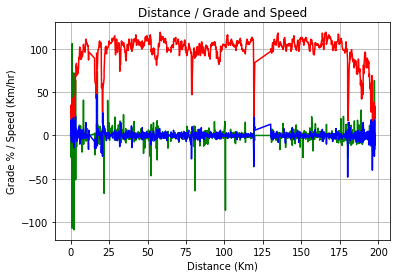

In [198]:
plt.plot(ImagesData['ComDistance']/1000, ImagesData['Grade']*100, 'g')
plt.plot(ImagesData['ComDistance']/1000, ImagesData['AverageSpeedInteger'], 'r')
plt.plot(ImagesData['ComDistance']/1000, ImagesData['Acceleration'], 'b')

#plt.plot(ImagesData['ComDistance']/1000, ImagesData['Distance']*3.6/ImagesData['Seconds'], 'r')
plt.xlabel('Distance (Km)')
plt.ylabel('Grade % / Speed (Km/hr)')
plt.title('Distance / Grade and Speed')
plt.grid(True)
plt.show()